<a href="https://colab.research.google.com/github/Den040404/sales/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22EDA_students_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных и начало машинного обучения



**Цели на буткемп:**

* провести разведочный анализ данных

* построить и проинтерпретировать ML-модель

* обернуть ее в интерактивный веб-сервис

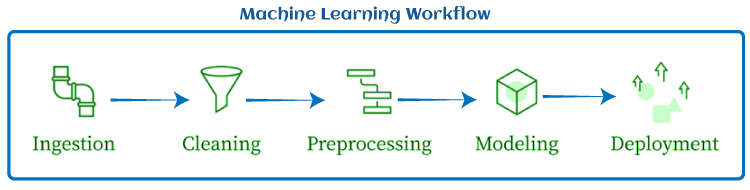

**Цели на сегодня:**

* понять влияние различных факторов (экономических, личных, социальных) на оценки студентов на экзаменах

* научиться делать разведочный анализ данных

* построить первую модель машинного обучения

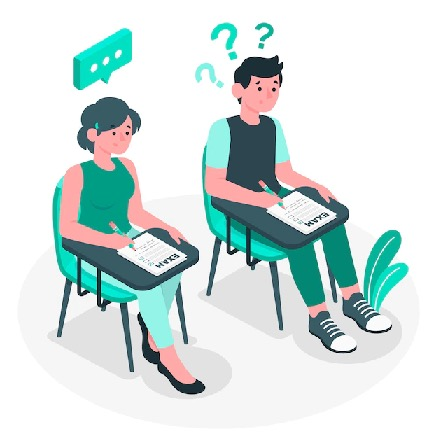

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("https://raw.githubusercontent.com/Den040404/sales/refs/heads/main/supermarket_sales.csv")

## Описание данных

* Invoice ID - идентификатор счета-фактора
* Branch - филиал
* City - город
* Customer type - тип клиента
* Gender - пол
* Product line - линейка продукта
* Unit price - цена за единицу товара
* Quantity - количество
* Tax 5% - налог 5%
* Total - общая сумма
* Date - дата покупки
* Time - время покупки
* Payment - способ оплаты
* cogs - себестоимость
* gross margin percentage - процент валовой прибыли
* gross income - валовый доход
* Rating - рейтинг

In [3]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


## Исследование данных

Размер датасета

In [4]:
df.shape

(1000, 17)

Информация о типах данных и пропусках

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Основные числовые характеристики

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


## Однофакторный анализ

## Math score, reading score

In [8]:
df[['Unit price','cogs', 'Total']].describe()

,Unit price,cogs,Total
count,1000.000000,1000.00000,1000.000000
mean,55.672130,307.58738,322.966749
std,26.494628,234.17651,245.885335
min,10.080000,10.17000,10.678500
25%,32.875000,118.49750,124.422375
50%,55.230000,241.76000,253.848000
75%,77.935000,448.90500,471.350250
max,99.960000,993.00000,1042.650000


Посмотрим на распределение оценок

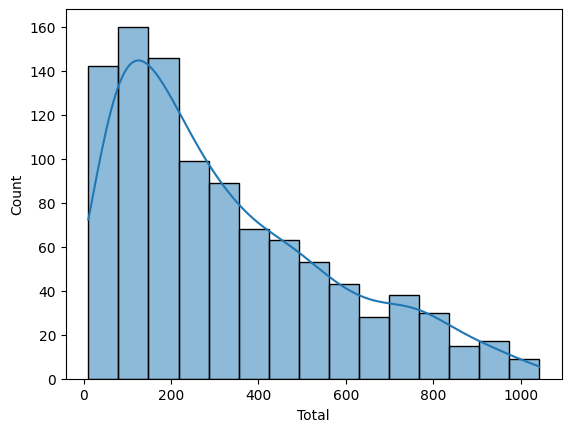

In [9]:
sns.histplot(df['Total'], kde=True)
plt.show()

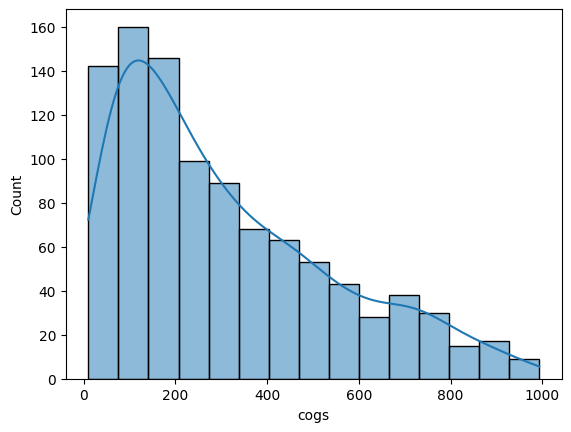

In [10]:
sns.histplot(df['cogs'], kde=True)
plt.show()

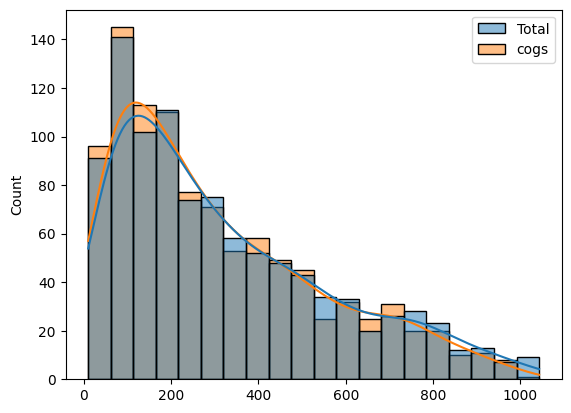

In [11]:
sns.histplot(df[['Total','cogs']], kde=True)
plt.show()

In [12]:
df['Total'] = np.where(df['Total'] < 0, 0, df['Total'])

df['Total'].min()

10.6785

Есть ли связь между баллами студента за разные экзамены?

Построим матрицу корреляций для ответа на этот вопрос.

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

<Axes: >

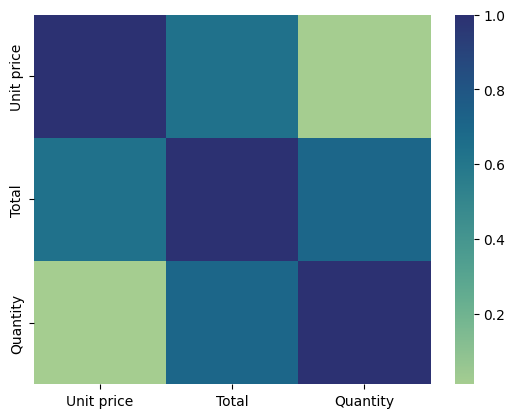

In [13]:
corr = df[['Unit price', 'Total', 'Quantity' ]].corr()

sns.heatmap(corr, cmap="crest")

Зависимость есть!

### Gender - пол

In [14]:
df['Gender'].value_counts(dropna=False)

,count
Gender,
Female,501
Male,499


Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [15]:
df['Gender'].value_counts(dropna=False, normalize=True)

,proportion
Gender,
Female,0.501
Male,0.499


Посмотрим простую гистограмму по полу

<ipython-input-16-bb47c4243f3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data = df, palette='bright')


<Axes: xlabel='Gender', ylabel='count'>

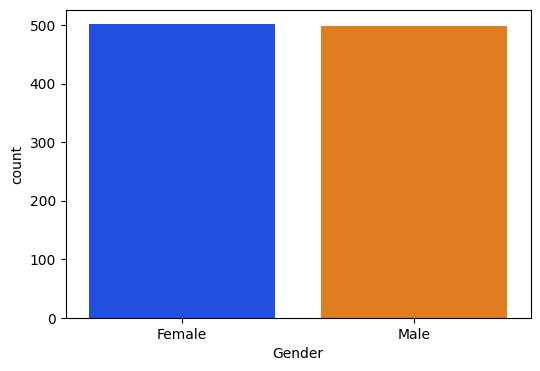

In [16]:
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data = df, palette='bright')

Визуализируем связь среднего балла по математике в зависимости от пола. На гистограмме изображены для каждой категории:

* средний балл
* доверительный интервал для среднего с вероятностью 95%

<ipython-input-17-eefe1393920b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total', data = df, palette='summer')


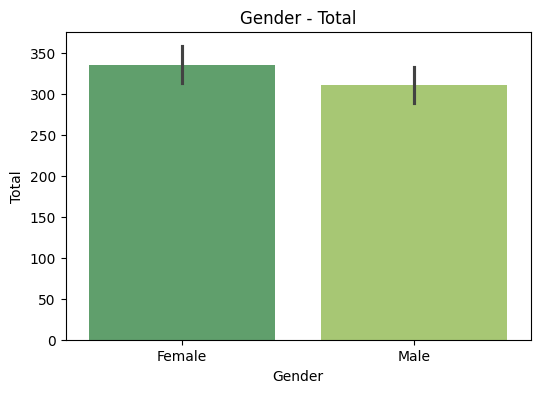

In [17]:
plt.figure(figsize=(6,4))

sns.barplot(x='Gender', y='Total', data = df, palette='summer')
plt.title('Gender - Total')
plt.show()

In [18]:
df[df.Gender == 'Female']['Total'].mean(), df[df.Gender == 'Male']['Total'].mean()

(335.09565868263473, 310.7892264529058)

Можно вычислять errorbars (интервалы) и [другими способами](https://seaborn.pydata.org/tutorial/error_bars.html):


eb.svg

Нарисуем errorbar, используя standard deviation (обычное стандартное отклонение)

<ipython-input-19-cc99e0b78a89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total', errorbar = "sd", data = df, palette='summer')


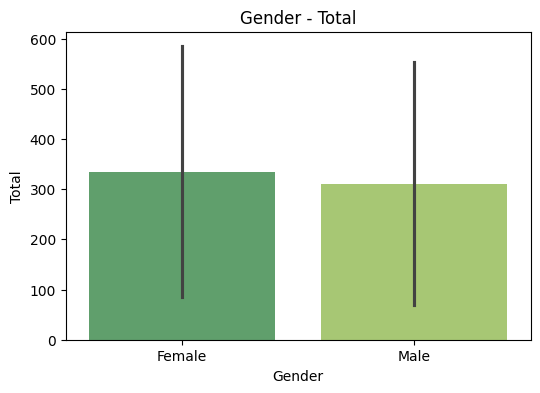

In [19]:
plt.figure(figsize=(6,4))

sns.barplot(x='Gender', y='Total', errorbar = "sd", data = df, palette='summer')
plt.title('Gender - Total')
plt.show()

### Customer type - тип клиента

Посмотрим, как влияет тип клиента (Customer type) на результаты продаж

In [20]:
df['Customer type'].value_counts()

,count
Customer type,
Member,501
Normal,499


Посмотрим, как тип клиента влиет на общую сумму.

<ipython-input-21-65f98580111f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer type', y='Total', data = df, palette='summer')


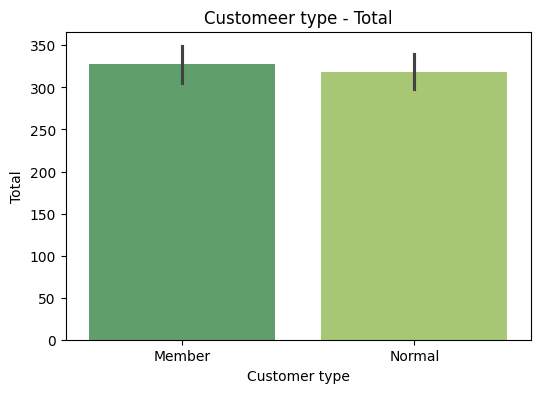

In [21]:
plt.figure(figsize=(6,4))

sns.barplot(x='Customer type', y='Total', data = df, palette='summer')
plt.title('Customeer type - Total')
plt.show()

Углубимся в разведочный анализ, и посмотрим как влияет связка факторов на общую сумму:

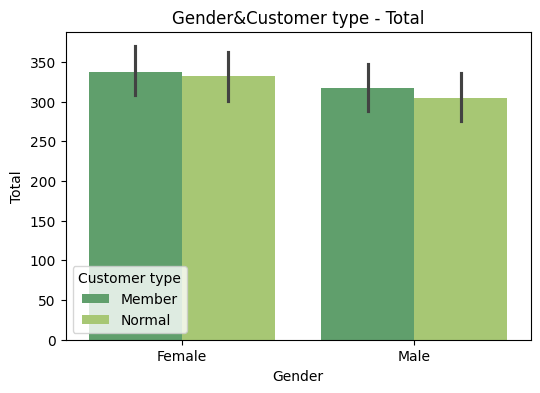

In [22]:
plt.figure(figsize=(6,4))

sns.barplot(x='Gender', y='Total', hue='Customer type', data = df, palette='summer')
plt.title('Gender&Customer type - Total')
plt.show()

Ещё один полезный вид визуализации - ящик с усами.

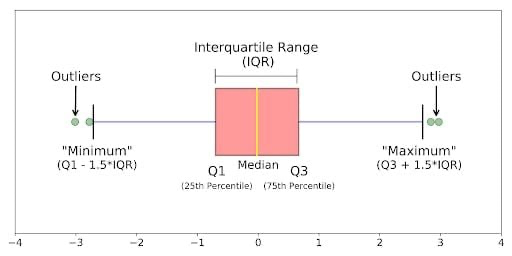

Посмотрим на ящик с усами, отображающий распределение балла по математике в зависимости от типа обеда (lunch).

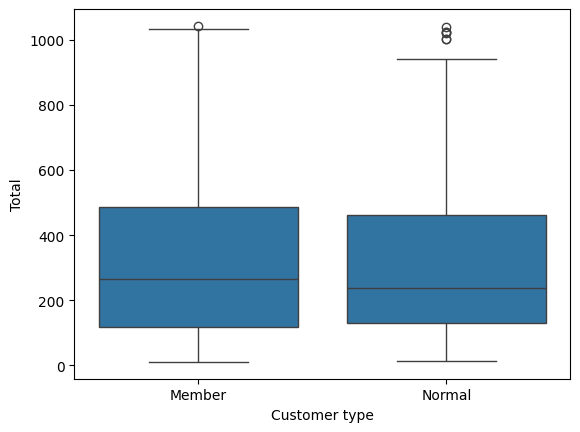

In [23]:
sns.boxplot(x="Customer type", y="Total", data=df)
plt.show()

## Бинаризация оценок

Будем считать, что магазин выполнил план продаж, если продал **не менее 4 товаров и общая скмма не менее 200**.

In [58]:
salesplan = 4

In [59]:
costplan = 200

Создадим столбцы `Total`, `Quantity`где поставим:

* 1 - если филиал выполнил план продаж
* 0 - если не выполнил

In [60]:
df['salesplan success'] = df['Quantity'].apply(lambda x: 1 if x >= salesplan else 0)
df['costplan success'] = df['Total'].apply(lambda x: 1 if x >= costplan else 0)

df['overall success'] = (df['salesplan success'] + df['costplan success'] == 2)

In [61]:
df[['salesplan success', 'costplan success', 'overall success']].sample(10)

,salesplan success,costplan success,overall success
743,0,0,False
162,1,1,True
196,0,0,False
132,1,0,False
659,0,0,False
630,1,1,True
424,0,0,False
122,1,1,True
247,1,0,False
620,0,1,False


In [ ]:
len(df[df['overall success'] == 0]) / len(df)

0.454

## Product line - продуктовая линия

In [28]:
df['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


<ipython-input-29-f1e5947acef8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total', data = df, palette='summer')


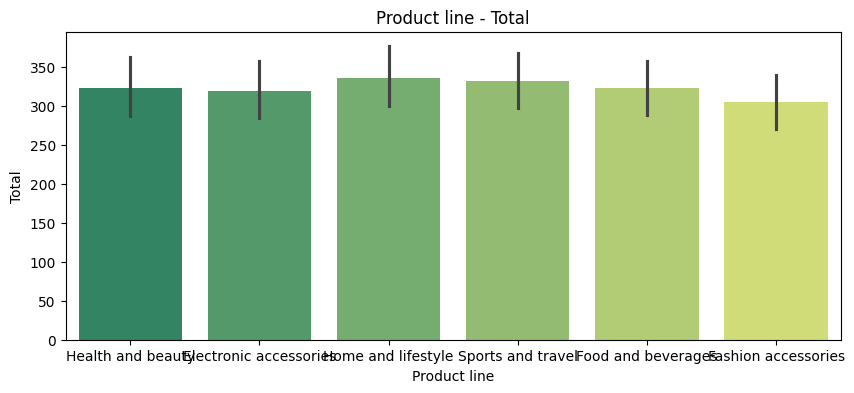

In [29]:
plt.figure(figsize=(10,4))

sns.barplot(x='Product line', y='Total', data = df, palette='summer')
plt.title('Product line - Total')
plt.show()

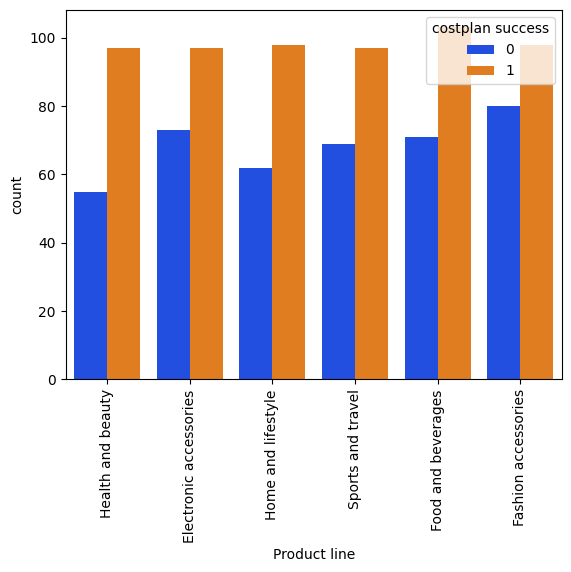

In [30]:
p = sns.countplot(x='Product line', data = df, hue='costplan success', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

## Test preparation course - курсы для подготовки к экзаменам

In [31]:
df['City'].value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


<ipython-input-32-207cf8fceca5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Total', data = df, palette='summer')


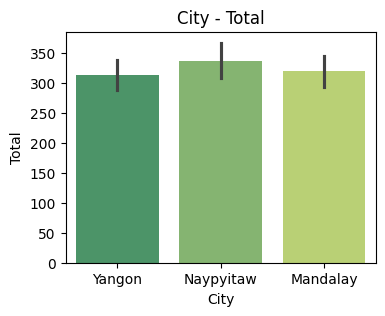

In [32]:
plt.figure(figsize=(4,3))

sns.barplot(x='City', y='Total', data = df, palette='summer')
plt.title('City - Total')
plt.show()

<Axes: xlabel='City', ylabel='count'>

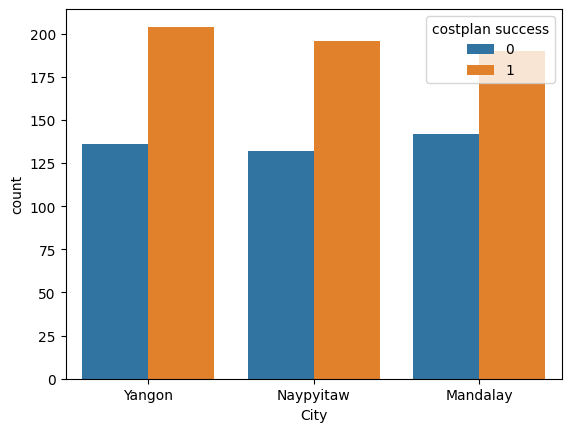

In [33]:
sns.countplot(x='City', data = df, hue='costplan success')

# Машинное обучение

## Предсказание успешной сдачи экзамена по `writing`

**Цель:** попробуем по характеристикам студентов предсказать, сдаст каждый из них экзамен по `writing` или нет.

Вопросы:

* *что такое матрица объект-признак? что такое целевая переменная?*

* *что такое тренировочные и тестовые данные? зачем разбивать все данные на тренировочные и тестовые?*

* *что в нашей задаче будет целевой переменной?*

* *что такое классификация и регрессия? какого типа наша задача?*

Схема машинного обучения:

* есть обучающие данные (с известными ответами) - на них модель учится находить зависимость ответов от признаков объектов

* есть тестовые данные (с неизвестными для модели ответами) - на них мы проверяем качество обученной модели

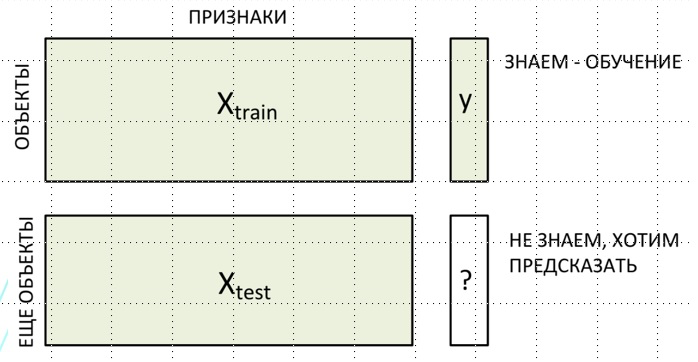

In [62]:
X = df.drop(['salesplan success','costplan success', 'Total', 'overall success'], axis=1)

y = df['costplan success'] # целевая переменная (target)

In [63]:
X.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Чтобы применять классические модели машинного обучения, необходимо перевести категориальные (не являющиеся числами и не ведущие себя как числа) признаки в числовые.

Возьмем сейчас только бинарные признаки:
* `lunch`
* `test preparation course`

Одну из категорий заменим на 1, другую на 0.

In [64]:
X['Gender'] = X['Gender'].map({'Female' : 1, 'Male' : 0})
X['Customer type'] = X['Customer type'].map({'Member' : 1, 'Normal' : 0})

In [65]:
X.drop(['Branch', 'City', 'Product line', 'Invoice ID', 'Date', 'Time', 'Payment'], axis=1, inplace=True)

In [66]:
X.head()

,Customer type,Gender,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
0,1,1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1
1,0,1,15.28,5,3.8200,76.40,4.761905,3.8200,9.6
2,0,0,46.33,7,16.2155,324.31,4.761905,16.2155,7.4
3,1,0,58.22,8,23.2880,465.76,4.761905,23.2880,8.4
4,0,0,86.31,7,30.2085,604.17,4.761905,30.2085,5.3


In [67]:
y[:5]

,costplan success
0,1
1,0
2,1
3,1
4,1


Разобъем данные на тренировочную и тестовую части

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((750, 9), (250, 9))

Для решения нашей задачи будем использовать линейный классификатор под названием **логистическая регрессия**.

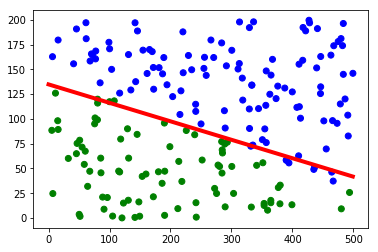

**Логистическая регрессия** - это линейный классификатор, прогноз которого является суммой признаков объектов с некоторыми коэффициентами (весами).

Когда модель предсказывает класс, она делает это по формуле
$$a(x) = sign(w_0 + w_1x_1 + w_2x_2 + ...),$$
то есть умножает признаки объекта $x_1,x_2,...$ на некоторые веса $w_0,w_1,w_2,...$

Например, если
* $x_1$ - `math score`
* $x_2$ - `lunch`,
то обученная модель может иметь вид
$$a(x) = sign(-12 + 1.2\cdot x_1 + 10\cdot x_2)$$

Веса модели подбираются автоматически так, чтобы модель как можно меньше ошибалась.

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
pred[:100]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
# y_test.value_counts(normalize=True)

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[101,   0],
       [  1, 148]])

0 планов продаж алгоритм идентифицирует как класс 1, но объект представляет собой класс 0 (False Positive), т. е. в 0 случаях он ошибается, а в 101 случаях не ошибается

1 план продаж алгоритм идентифицирует как класс 0, но объект представляет собой класс 1 (False Negative), т. е. в 1 случае он ошибается, а в 148 случаях не ошибается

Precision=148/(148+0)=1
Recall=148/(148+1)=0,993

In [ ]:
# len(y_test[y_test == 0]), len(y_test[y_test == 1]), len(pred[pred == 0])

In [73]:
model.coef_

array([[ 0.85210255, -1.80920881, -0.0610978 , -0.34713662,  0.03218623,
         0.64372451, -0.16280531,  0.03218623,  0.62508833]])

## Что дальше?

На следующем занятии:
* подробнее о том, что происходит при обучении логистической регрессии
* как интерпретировать результат/прогноз модели?
* как повлиять на прогнозы модели (выявить больше не сдавших экзамен)?
* как можно работать с категориальными признаками, у которых больше двух значений?

И начинаем двигаться в сторону сервиса! Обсудим Git и GitHub!

# Курсы сообщества AI Education

**Интенсивы**

---
[Разведочный анализ данных](https://stepik.org/a/177213)

На интенсиве вы познакомитесь с основными и продвинутыми подходами анализа данных:
  * Научитесь исследовать данные при помощи современных библиотек (NumPy, Pandas, Polars, Matplotlib, Seaborn)
  * Обучите свою первую модель машинного обучения
  * Построите интерактивный дашборд при помощи инструмента ExplainerDashboard
  * Начнете использовать такие инструменты разработчика как Git и Docker


[Линейные модели и их презентация](https://stepik.org/a/177215)  

В курсе вы не только разберете теоретическую сторону предмета, но и узнаете как использовать модели на практике:
  * Будете оценивать качество моделей регрессии и классификации
  * Проходить все этапы задачи ML: от разведочного анализа до получения прогноза и его интерпретации
  * Cтроить интерактивные дашборды при помощи библиотеки Streamlit
  * Cоздавать веб-сервисы с использованием фреймворка FastApi


В каждом интенсиве по 9 вебинаров (4 по анализу данных / 4 по разработке / финальный с подведением итогов и защитой проектов по желанию).

**Курсы**

---

[Практический Machine Learning](https://stepik.org/a/125501)

  * Курс посвящен изучению всех основных задач и подходов в машинном обучении. Курс дает как теорию методов, так и обширную практику.
  * За 16 недель курса вы пройдете путь практически с нуля в машинном обучении до уверенного владения основными алгоритмами и подходами.

[Прикладные задачи машинного обучения](https://stepik.org/a/175967)

* В курсе подробно разобраны следующие темы:

  * построение рекомендательных систем
  * анализ временных рядов
  * продвинутые методы интерпретации ML-моделей
  * AutoML

* Курс находится в процессе наполнения, в нем будут появляться новые актуальные и прикладные в ML-темы.